In [7]:
from spacepy import pycdf
import numpy as np

cdf = pycdf.CDF("../input/l1_cdf_data_l2.cdf")
for var in cdf:
    print(f"{var}: shape={np.shape(cdf[var][:])}")
    print(cdf[var][:])

bitstring_index: shape=(10,)
[ 1  2  3  4  5  6  7  8  9 10]
total_counts_per_energy: shape=(10, 16, 45)
[[[24689. 21137. 19692. ... 21293. 22658. 20239.]
  [22498. 19662. 22980. ... 21776. 22263. 18591.]
  [19982. 21379. 22458. ... 18249. 24722. 20201.]
  ...
  [22367. 21912. 21142. ... 22750. 24472. 21632.]
  [20957. 21458. 20802. ... 24023. 18727. 23028.]
  [21459. 23887. 22156. ... 22514. 22219. 19719.]]

 [[23539. 23111. 22061. ... 19524. 17147. 18758.]
  [21319. 17631. 19877. ... 22150. 21360. 20093.]
  [18951. 17120. 22211. ... 23215. 19226. 22631.]
  ...
  [22245. 15804. 21830. ... 21503. 21089. 23661.]
  [22918. 18897. 21999. ... 21126. 20967. 16228.]
  [17433. 25180. 20880. ... 22896. 23922. 21479.]]

 [[23436. 19218. 19327. ... 18254. 21615. 22787.]
  [20226. 20514. 21036. ... 21859. 21724. 21131.]
  [18602. 21954. 20816. ... 16919. 21141. 20861.]
  ...
  [22467. 18818. 18107. ... 20416. 23069. 20135.]
  [23572. 20301. 23448. ... 17774. 21116. 20139.]
  [21295. 22302. 21517.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from spacepy import pycdf

In [5]:
cdf_path = "../input/l1_cdf_data_l2.cdf"
cdf = pycdf.CDF(cdf_path)

# 查看變數列表
print(list(cdf))

# 取得 shape
total_counts_all = cdf["total_counts_per_energy"][:]   # shape => (num_bitstrings, 16, 45)
mean_counts_all  = cdf["mean_counts_per_energy"][:]    # shape => (num_bitstrings, 16, 45)
bitstring_index  = cdf["bitstring_index"][:]           # shape => (num_bitstrings,)

cdf.close()

['bitstring_index', 'total_counts_per_energy', 'mean_counts_per_energy']


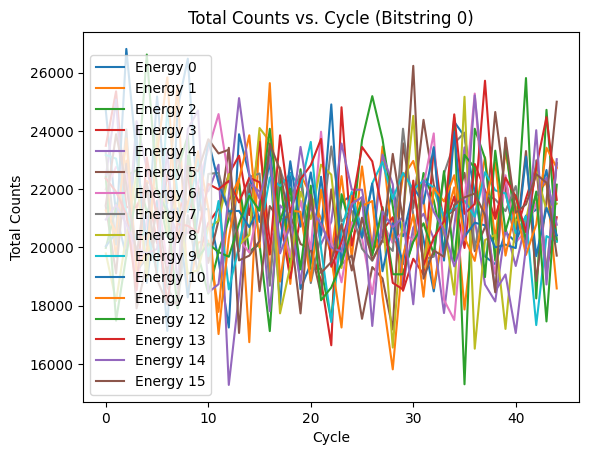

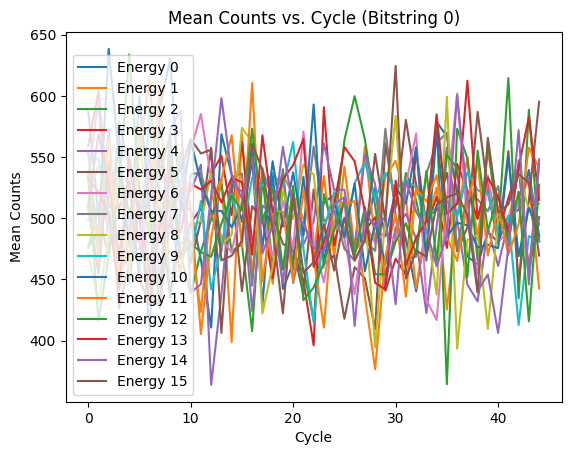

In [9]:

# 先抓第0筆bitstring的數據 => shape: (16, 45)
# 16 = energy channel, 45 = cycles
total_counts_0 = total_counts_all[0]  
mean_counts_0  = mean_counts_all[0]

# 產生 x 軸 (cycle 0~44)
x = np.arange(total_counts_0.shape[1])  # shape[1] = 45


plt.figure()  # 開啟一個新的繪圖窗口
for e in range(total_counts_0.shape[0]):  # e 從 0 到 15
    plt.plot(x, total_counts_0[e], label=f"Energy {e}")

plt.title("Total Counts vs. Cycle (Bitstring 0)")
plt.xlabel("Cycle")
plt.ylabel("Total Counts")
plt.legend()
plt.show()  

plt.figure()  
for e in range(mean_counts_0.shape[0]):
    plt.plot(x, mean_counts_0[e], label=f"Energy {e}")

plt.title("Mean Counts vs. Cycle (Bitstring 0)")
plt.xlabel("Cycle")
plt.ylabel("Mean Counts")
plt.legend()
plt.show() 